In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from scipy.stats import linregress
import plotly.graph_objects as go

In [67]:
np.random.seed(80)
number_of_students = 500
study_hours = np.random.uniform(1, 8, number_of_students)

# Add Gaussian noise
noise = np.random.normal(0, 2, number_of_students)

# We scale sum of study_hours and noise (0-20): (2*8)+(1+2)=20
grades = 2 * study_hours + (1 + noise) 


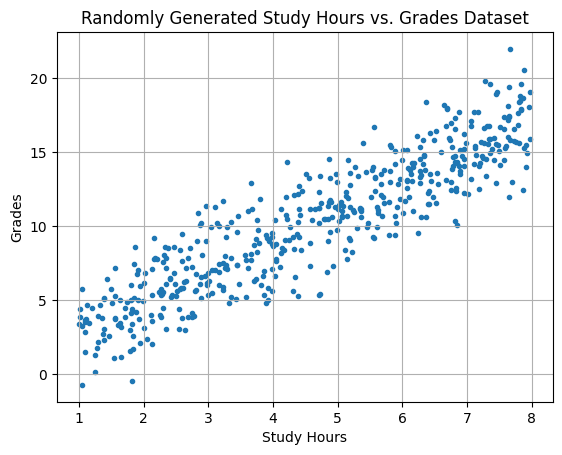

In [68]:
# Plot the generated data
plt.scatter(study_hours, grades, marker='.')
plt.xlabel('Study Hours')
plt.ylabel('Grades')
plt.title('Randomly Generated Study Hours vs. Grades Dataset')
plt.grid(True)
plt.show()

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(study_hours.reshape(-1, 1), grades, test_size=0.1)


In [70]:
class LSS:
    def __init__(self):
        self.w = None
    def fit(self, X_train, Y_train):
        self.w = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_train.T, X_train)),X_train.T),Y_train)
    def predict(self, X_test):
        return np.matmul(X_test, self.w)


In [71]:
lss = LSS()
lss.fit(X_train, Y_train)
Y_pred = lss.predict(X_test)

In [72]:
slope, intercept, r_value, p_value, std_err = linregress(study_hours, grades)
Y = slope * study_hours + intercept

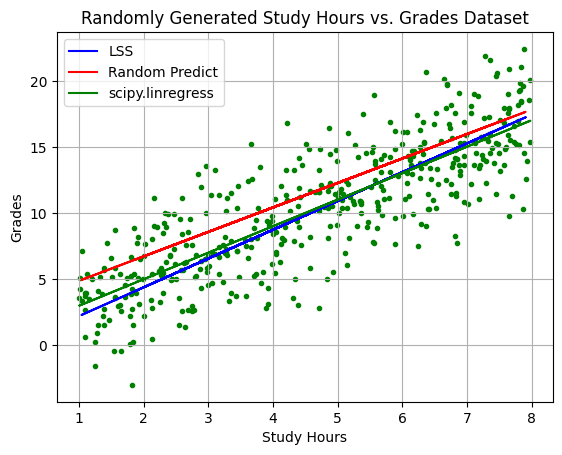

In [82]:
plt.scatter(X_train, Y_train, marker='.', c = 'green')
plt.plot(X_test, Y_pred, c = 'blue', label = 'LSS')
plt.plot(X_test, 0.85 * Y_pred + 3, c = 'red', label = 'Random Predict')
plt.plot(study_hours, Y , c='green', label='scipy.linregress')
plt.xlabel('Study Hours')
plt.ylabel('Grades')
plt.title('Randomly Generated Study Hours vs. Grades Dataset')
plt.legend()
plt.grid(True)
plt.show()